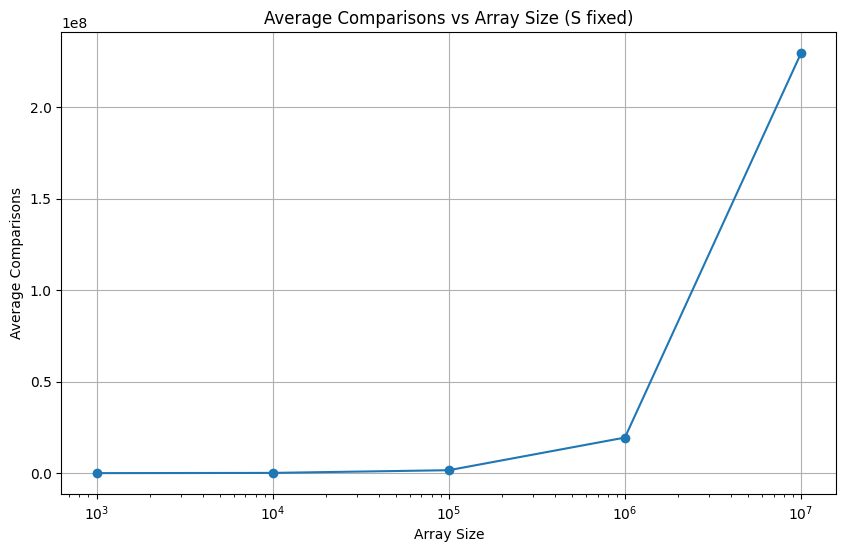

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the datasets
new_partd_df = pd.read_csv('/work/partd.csv')
new_partci_df = pd.read_csv('/work/partci.csv')
new_partcii_df = pd.read_csv('/work/partcii.csv')
new_partciii_df = pd.read_csv('/work/partciii.csv')

# Task (c) - i: Plot key comparisons vs array size with S fixed (from partci_df)
plt.figure(figsize=(10, 6))
plt.plot(new_partci_df['ArraySize'], new_partci_df['Average Comparisons'], marker='o')
plt.title('Average Comparisons vs Array Size (S fixed)')
plt.xlabel('Array Size')
plt.ylabel('Average Comparisons')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)
plt.show()

Text

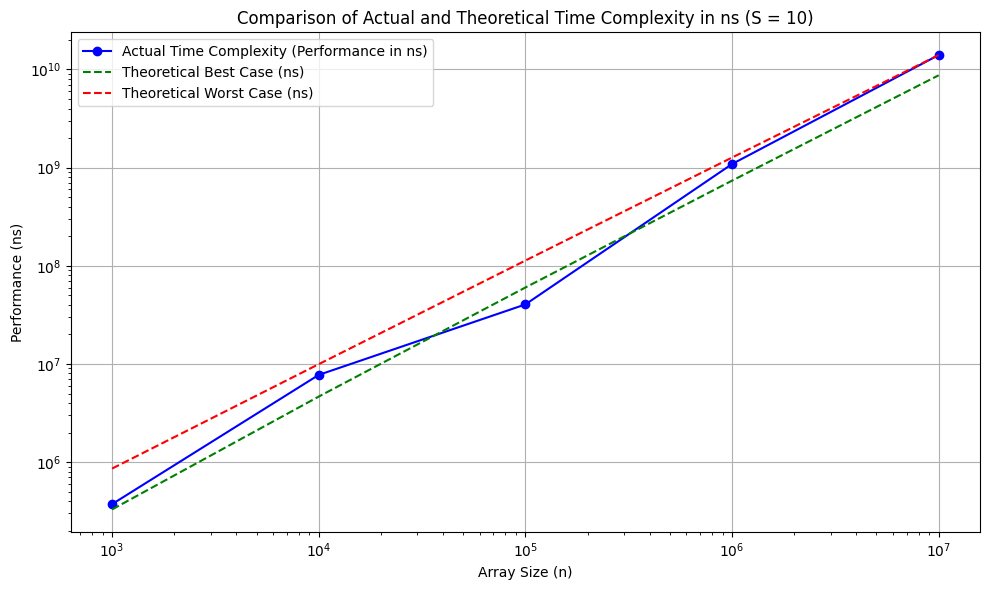

In [2]:
# Extract array sizes and performance (ns) from partci_df (actual data)
n_values_actual = new_partci_df['ArraySize'].values
performance_ns_actual = new_partci_df['Performance (ns)'].values

# Define the theoretical calculations for time complexity with S = 10
S = 10  # Threshold for switching to insertion sort

# Theoretical best-case time complexity: θ(n + n log(n/S))
best_case_theoretical = n_values_actual + n_values_actual * np.log(n_values_actual / S)

# Theoretical worst-case time complexity: θ(nS + n log(n/S))
worst_case_theoretical = n_values_actual * S + n_values_actual * np.log(n_values_actual / S)

# Apply a scaling factor to convert theoretical values into nanoseconds
scaling_factor = performance_ns_actual[-1] / worst_case_theoretical[-1]  # Scale based on the largest data point
best_case_theoretical_ns = best_case_theoretical * scaling_factor
worst_case_theoretical_ns = worst_case_theoretical * scaling_factor

# Plot the actual and theoretical time complexity
plt.figure(figsize=(10, 6))

# Plot actual performance
plt.plot(n_values_actual, performance_ns_actual, marker='o', label='Actual Time Complexity (Performance in ns)', color='blue')

# Plot theoretical best case
plt.plot(n_values_actual, best_case_theoretical_ns, '--', label='Theoretical Best Case (ns)', color='green')

# Plot theoretical worst case
plt.plot(n_values_actual, worst_case_theoretical_ns, '--', label='Theoretical Worst Case (ns)', color='red')

# Add labels and title
plt.title('Comparison of Actual and Theoretical Time Complexity in ns (S = 10)')
plt.xlabel('Array Size (n)')
plt.ylabel('Performance (ns)')
plt.xscale('log')  # Log scale for array size
plt.yscale('log')  # Log scale for performance (time complexity)
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

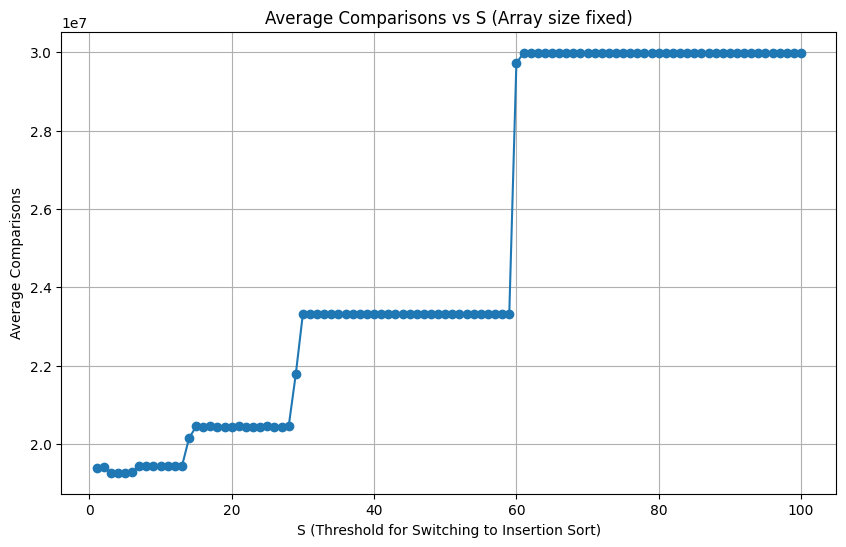

In [3]:
# Task (c) - ii: Plot key comparisons vs S with array size fixed (from partcii_df)
plt.figure(figsize=(10, 6))
plt.plot(new_partcii_df['S'], new_partcii_df['Average Comparisons'], marker='o')
plt.title('Average Comparisons vs S (Array size fixed)')
plt.xlabel('S (Threshold for Switching to Insertion Sort)')
plt.ylabel('Average Comparisons')
plt.grid(True)
plt.show()

Text

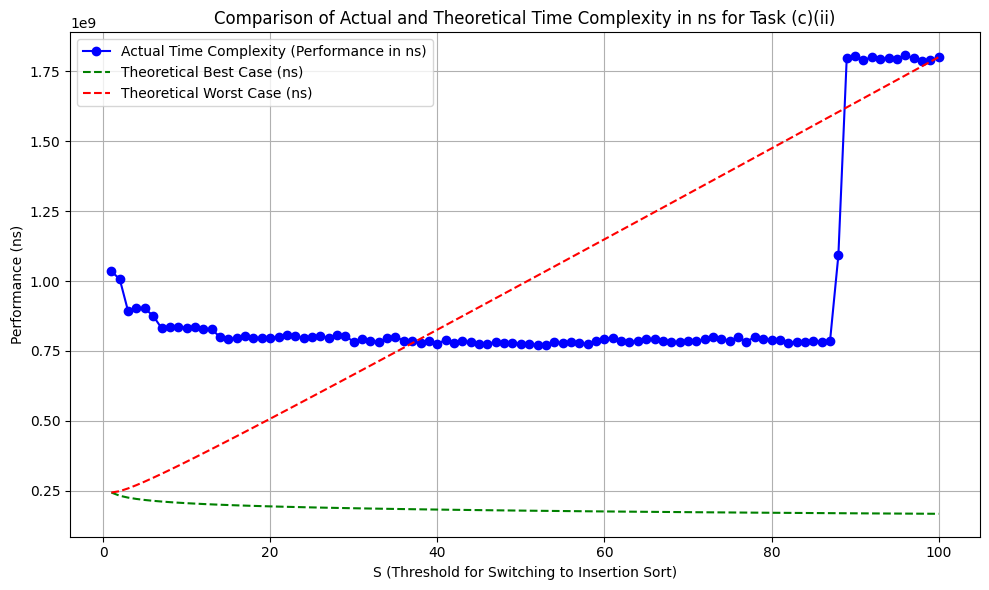

In [4]:
# Extract S and performance data for task (c)(ii) from new_partcii_df
S_values = new_partcii_df['S'].values
performance_ns_actual = new_partcii_df['Performance (ns)'].values
array_size = 1000000  # Fixed array size

# Define the theoretical calculations for time complexity with S varying and n fixed
n = array_size  # Fixed array size

# Theoretical best-case time complexity: θ(n + n log(n/S))
best_case_theoretical = n + n * np.log(n / S_values)

# Theoretical worst-case time complexity: θ(nS + n log(n/S))
worst_case_theoretical = n * S_values + n * np.log(n / S_values)

# Apply a scaling factor to convert theoretical values into nanoseconds
scaling_factor = performance_ns_actual[-1] / worst_case_theoretical[-1]  # Scale based on the largest data point
best_case_theoretical_ns = best_case_theoretical * scaling_factor
worst_case_theoretical_ns = worst_case_theoretical * scaling_factor

# Plot the actual and theoretical time complexity for task c(ii)
plt.figure(figsize=(10, 6))

# Plot actual performance
plt.plot(S_values, performance_ns_actual, marker='o', label='Actual Time Complexity (Performance in ns)', color='blue')

# Plot theoretical best case
plt.plot(S_values, best_case_theoretical_ns, '--', label='Theoretical Best Case (ns)', color='green')

# Plot theoretical worst case
plt.plot(S_values, worst_case_theoretical_ns, '--', label='Theoretical Worst Case (ns)', color='red')

# Add labels and title
plt.title('Comparison of Actual and Theoretical Time Complexity in ns (n = 1000000)')
plt.xlabel('S (Threshold for Switching to Insertion Sort)')
plt.ylabel('Performance (ns)')
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

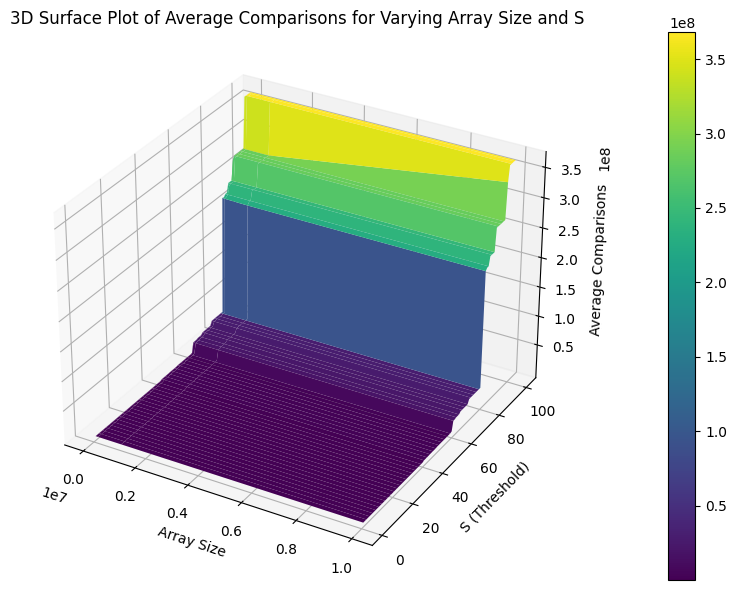

In [5]:
# Task (c) - iii: 3D Surface Plot of key comparisons for varying array size and S
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prep data for 3D plot
X = new_partciii_df['ArraySize'].values
Y = new_partciii_df['S'].values
Z = new_partciii_df['Average Comparisons'].values

# Meshgrid for array size and S
X_unique = np.unique(X)
Y_unique = np.unique(Y)
X_mesh, Y_mesh = np.meshgrid(X_unique, Y_unique)

# Reshape Z values to fit meshgrid
Z_mesh = Z.reshape(len(Y_unique), len(X_unique))

# Plot surface
surf = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_title('3D Surface Plot of Average Comparisons for Varying Array Size and S')
ax.set_xlabel('Array Size')
ax.set_ylabel('S (Threshold)')
ax.set_zlabel('Average Comparisons', labelpad=5)
ax.zaxis.get_offset_text().set_position((0, 0.05))

# Add color bar to the plot
fig.colorbar(surf, pad=0.1)
plt.tight_layout()
plt.show()

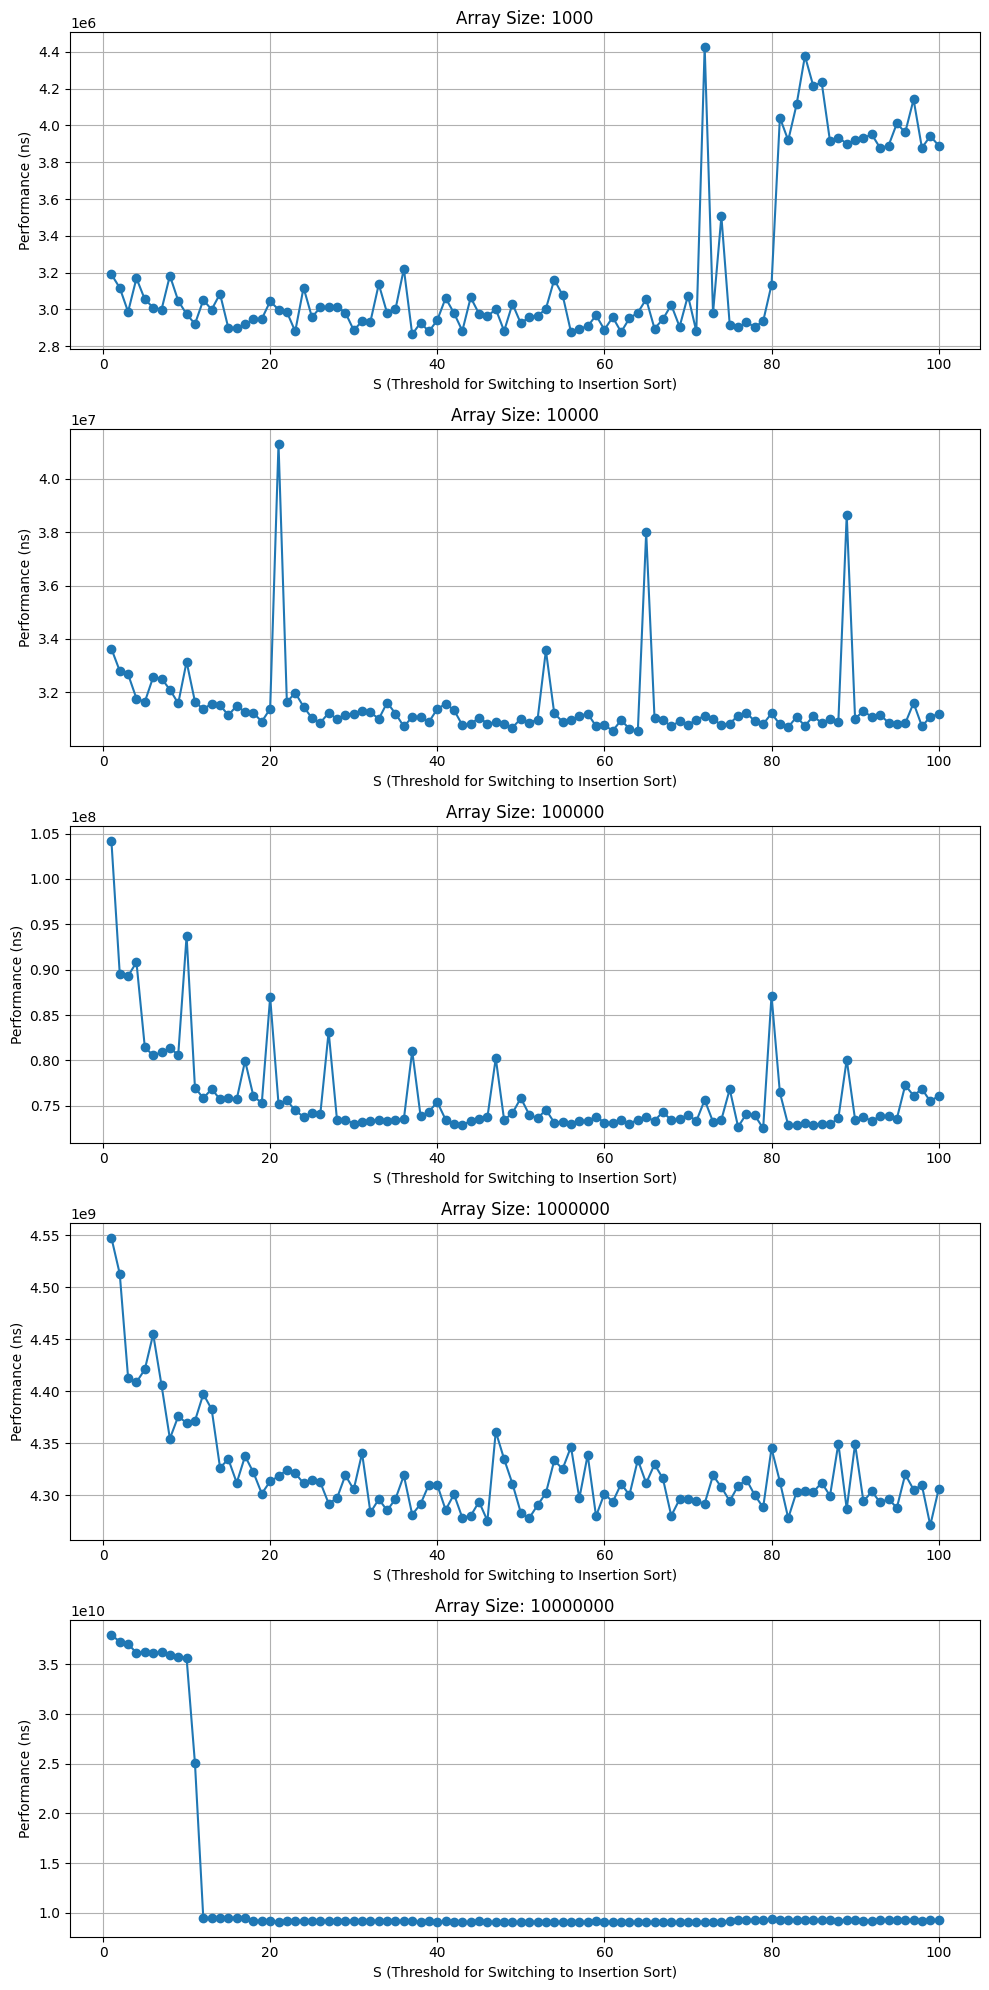

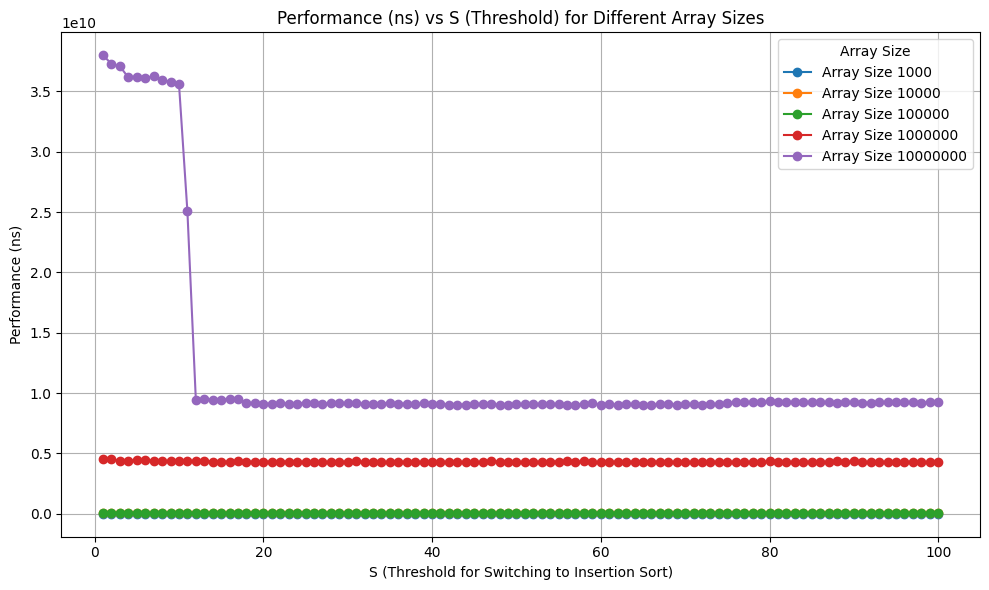

In [6]:
# Task (c) - iii:Plot of key comparisons for varying S vs Performance (ns)

# Get unique array sizes
array_sizes = new_partciii_df['ArraySize'].unique()

# Create subplots for each array size
fig, axs = plt.subplots(len(array_sizes), 1, figsize=(10, len(array_sizes) * 4))

# Iterate through each array size and create a 2D plot for each
for i, array_size in enumerate(array_sizes):
    # Filter data for the current array size
    subset = new_partciii_df[new_partciii_df['ArraySize'] == array_size]
    
    # Plot S vs Performance (ns) for this array size
    axs[i].plot(subset['S'], subset['Performance (ns)'], marker='o')
    axs[i].set_title(f'Array Size: {array_size}')
    axs[i].set_xlabel('S (Threshold for Switching to Insertion Sort)')
    axs[i].set_ylabel('Performance (ns)')
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Get unique array sizes
array_sizes = new_partciii_df['ArraySize'].unique()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each array size as a separate line, but comparing S vs Performance (ns)
for array_size in array_sizes:
    # Filter data for the current array size
    subset = new_partciii_df[new_partciii_df['ArraySize'] == array_size]
    
    # Plot S vs Performance for this array size
    plt.plot(subset['S'], subset['Performance (ns)'], marker='o', label=f'Array Size {array_size}')

# Add title and labels
plt.title('Performance (ns) vs S (Threshold) for Different Array Sizes')
plt.xlabel('S (Threshold for Switching to Insertion Sort)')
plt.ylabel('Performance (ns)')

# Add a legend to differentiate between array sizes
plt.legend(title='Array Size')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

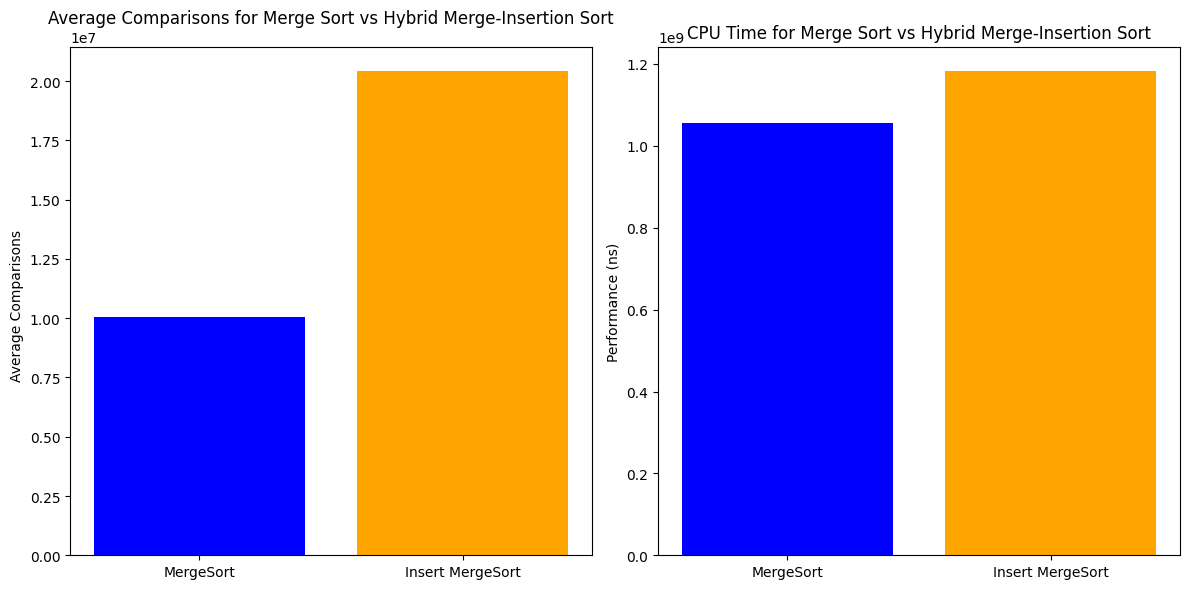

In [7]:
# Task (d): Compare original Merge Sort and Hybrid Merge-Insertion Sort (from partd_df)
plt.figure(figsize=(12, 6))

# Plot Avg Comparisons for Merge Sort and Hybrid Merge-Insertion Sort
plt.subplot(1, 2, 1)
plt.bar(new_partd_df['Type'], new_partd_df['Average Comparisons'], color=['blue', 'orange'])
plt.title('Average Comparisons for Merge Sort vs Hybrid Merge-Insertion Sort')
plt.ylabel('Average Comparisons  ')

# Plot CPU Time (Perf) for Merge Sort and Hybrid Merge-Insertion Sort
plt.subplot(1, 2, 2)
plt.bar(new_partd_df['Type'], new_partd_df['Performance (ns)'], color=['blue', 'orange'])
plt.title('CPU Time for Merge Sort vs Hybrid Merge-Insertion Sort')
plt.ylabel('Performance (ns)')

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b823ebc1-0213-4bde-ab56-1ec86f682c90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>